# Softmax Classifier using TensorFlow 2.0

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [3]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.7.0


Here is the list of all the dataset present in TensorFlow

https://www.tensorflow.org/api_docs/python/tf/keras/datasets

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print('X_train: '  + str(x_train.shape))
print('Y_train: '  + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str( y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [6]:
# normalising the images to convert all the pixel values between 0 and 1

x_train, x_test = x_train / 255.0, x_test / 255.0

In this dataset we have a total of 70000 images out of which 60000 are present in train dataset and rest 10000 are present in test dataset. Each image is of shape 28x28 and we have normalize the images so each pixel value lies between 0-1.

## Printing an image at a particular index

**PIL**(Python Imaging Library) is a free and open-source additional library for the Python programming language that adds support for opening, manipulating, and saving many different image file formats.

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html


RGB VS RGBA

https://www.geeksforgeeks.org/difference-between-rgb-vs-rgba-color-format/#:~:text=RGB%20is%20a%20three%2Dchannel,Blue%2C%20and%20an%20Alpha%20value.

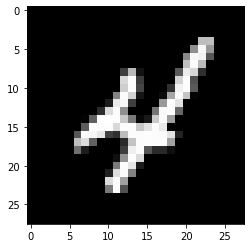

The image shown has an output label 4


In [10]:
index= 9  # we can modify this value
plt.imshow(x_train[index], cmap = plt.get_cmap('gray'))
plt.show()
print('The image shown has an output label', y_train[index])

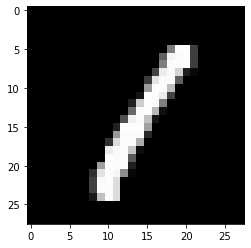

The image shown has an output label 1


In [9]:
index= 3  # we can modify this value
plt.imshow(x_train[index], cmap=plt.get_cmap('gray'))
plt.show()
print('The image shown has an output label', y_train[index])

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)


We're going to want our class-labels as "one-hot vectors". A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. In this case, the t-th digit will be represented as a vector which is 1 in the t-th dimension. For example, 3 would be [0,0,0,1,0,0,0,0,0,0]

In [11]:
#We have to perform one hot encoding of categorical variables, we can convert the variables to one hot encoding using to_categorical function

y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_categorical  = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [12]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)


If you want to assign probabilities to an object being one of several different things, softmax (Multiclass Logistic regression) is the thing to do, because softmax gives us a list of values between 0 and 1 that add up to 1. Even later on, when we train more sophisticated models, the final step will be a layer of softmax.

A softmax regression has two steps: first we add up the evidence of our input being in certain classes, and then we convert that evidence into probabilities.


In [13]:
# Get a list of devices like GPUs and CPUs available to TF

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13570921169497646536
xla_global_id: -1
]


## <font color='red'> Building our model </font>
### Now we have prepared the dataset, the next steps in deep learning models in tensorflow 2.0 are as follows.
1. Defining the architecture of the model.
2. Compile the model by defining loss function, optimizer and performance metrics.
3. Fit the model in the dataset.

## Defining the architecture of the model

https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

A Sequential model is not appropriate when:

* Your model has multiple inputs or multiple outputs
* Any of your layers has multiple inputs or multiple outputs
* You need to do layer sharing
* You want non-linear topology (e.g. a residual connection, a multi-branch model)

In [14]:
# we always define the layers and the input shape in the layers
# first we will flatten the 2D input to 1d vector, now we will have 784 dim for each datapoint
# then we will pass it through dense layers, and finally with output dense layer with activation as softmax

# The Sequential constructor takes an array of Keras Layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax')
]) # first dense layer has 128 nodes, second dense layer has 64 nodes.
model.summary()# last layer has 10 nodes with softmax because we have 10 Labels in Target feature.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


# Compiling the Model

In [15]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/

# Training The Model

In [16]:
history = model.fit(
    x_train,
    y_train_categorical,
    epochs=5,
    validation_data = (x_test,y_test_categorical)
    )
# The returned history object holds a record of the loss values and metric values during training:

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2382 - accuracy: 0.9303 - val_loss: 0.1380 - val_accuracy: 0.9604
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1003 - accuracy: 0.9700 - val_loss: 0.0919 - val_accuracy: 0.9688
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0700 - accuracy: 0.9782 - val_loss: 0.0796 - val_accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0521 - accuracy: 0.9834 - val_loss: 0.0727 - val_accuracy: 0.9781
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0419 - accuracy: 0.9864 - val_loss: 0.0855 - val_accuracy: 0.9747


https://www.tensorflow.org/guide/keras/train_and_evaluate

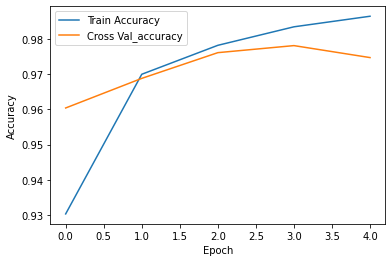

In [20]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Cross Val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.show()

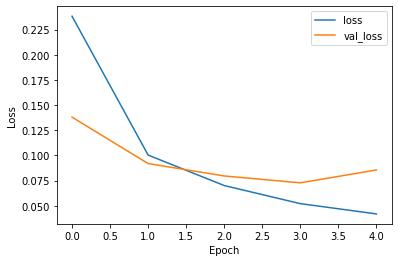

In [22]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.show()

https://colab.research.google.com/github/AviatorMoser/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb#scrollTo=sK5FQ7c4Ov8M